<a href="https://colab.research.google.com/github/Itsritu/oibsip_3/blob/main/Predicting_House_Price(Linear_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Project Name:** Predicting House Prices with Linear Regression

## **1. Data Collection :-**

In [26]:
# Importing the necessary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso

In [118]:
# Importing the drive module from the google.colab library
from google.colab import drive

# Mounting the Google Drive at the specified location '/content/drive'
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
# Reading the data
df = pd.read_csv('/content/Housing.csv')

In [28]:
# Looking ats the top 5 rows of the dataset
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [29]:
# Looikng at the bottom 5 rows of the data
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


## **2. Data Exploration :-**

In [30]:
# Displaying information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [31]:
# Displaying statistics summary
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [32]:
# Looking for missing values
missing_values  = df.isnull().sum()
missing_values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Observed, No missing values are present in the dataset.

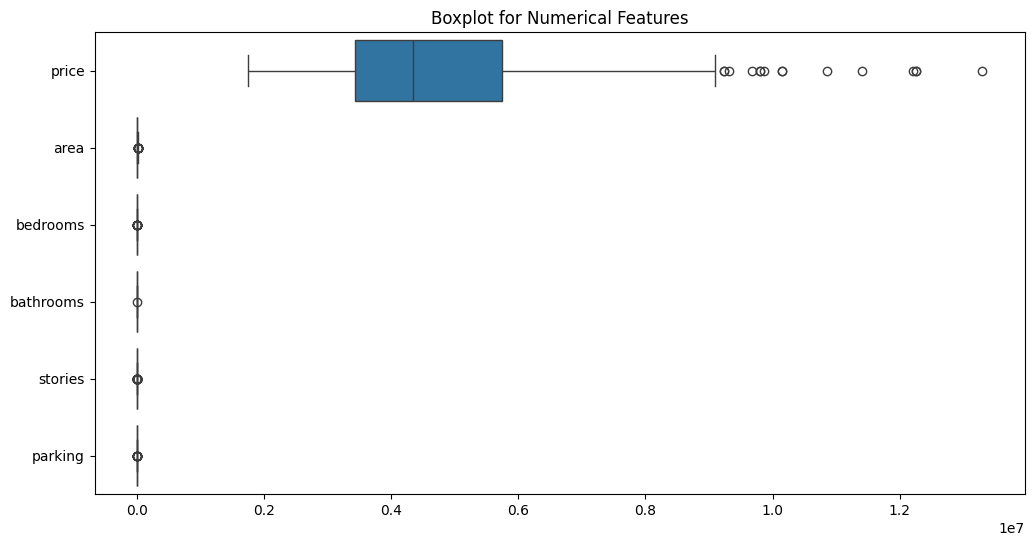

In [33]:
# Check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h")
plt.title('Boxplot for Numerical Features')
plt.show()

In [34]:
# Extracting numerical columns
cols_for_outlier_detection = df.select_dtypes(include=['int64', 'float64']).astype(bool)

# Calculate z-scores for the selected columns
z_scores = df[cols_for_outlier_detection].apply(lambda x: np.abs((x - x.mean()) / x.std()))

# Set a threshold for outlier detection
threshold = 3

# Identify outliers based on the threshold
outliers = df[z_scores > threshold]

## **3. Feature Selection :-**

In [35]:
# Extract numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64'])

<ipython-input-37-00f08dd25560>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


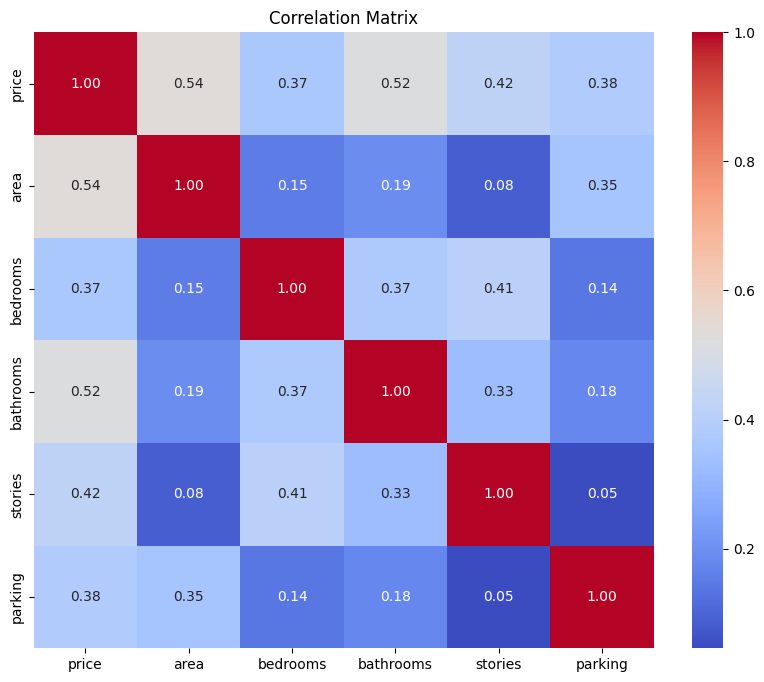

In [37]:
# Visualize correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [56]:
# Assuming 'price' is the target variable
target_variable = 'price'

In [39]:
correlation_with_target = df.corr()[target_variable].abs().sort_values(ascending=False)
# Excluding the target variable itself
relevant_features = correlation_with_target[1:]

<ipython-input-39-a8835032bebc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = df.corr()[target_variable].abs().sort_values(ascending=False)


In [57]:
# Assigning the data to 'x'
x = df

In [58]:
# Identifying categorical columns
categorical_columns = x.select_dtypes(include=['object']).columns

In [59]:
# One-hot encode categorical columns
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_columns)],
    remainder='passthrough'
)
X_encoded = preprocessor.fit_transform(x)

In [60]:
# Displaying relevant features
print("Relevant Features:")
print(relevant_features)

Relevant Features:
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64


In [61]:
# Feature Selection (using SelectKBest and f_regression)
# Selecting top k features using SelectKBest and f_regression
k = 3
X = df.drop(target_variable, axis=1)
y = df[target_variable]
selector = SelectKBest(f_regression, k=k)

selector = SelectKBest(f_regression, k=k)
X_selected = selector.fit_transform(X_encoded, y)

In [64]:
# Getting the maximum index returned by the selector
max_index = max(selector.get_support(indices=True), default=-1)

# Ensuring that the maximum index is within the range of column indices
if max_index < len(x.columns):
    # Displaying selected features
    selected_features = x.columns[selector.get_support(indices=True)]
    print(f"Selected Features: {selected_features}")
else:
    print("Error: Selector returned an index out of bounds.")


Error: Selector returned an index out of bounds.


## **4. Model Training :-**

In [65]:
# Feature Selection (using SelectKBest and f_regression as shown in the previous response)
k = 5  # Adjust based on your requirements
X = df.drop(target_variable, axis=1)
y = df[target_variable]
selector = SelectKBest(f_regression, k=k)

selector = SelectKBest(f_regression, k=k)
X_selected = selector.fit_transform(X_encoded, y)

In [66]:
# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [67]:
# Initializing and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [68]:
predictions_on_test = model.predict(X_test)
predictions_on_train = model.predict(X_train)

## **5. Model Evaluation :-**

In [70]:
mse_testing = mean_squared_error(y_test, predictions_on_test)
rmse_testing = mse_testing ** 0.5
r2t_testing = r2_score(y_test, predictions_on_test)

In [73]:
mse_training = mean_squared_error(y_train, predictions_on_train)
rmse_training = mse_training ** 0.5
r2_training = r2_score(y_train, predictions_on_train)

In [75]:
# Displaying the terms
print("Test Set Metrics:")
print("Mean Squared Error(MSE): ",mse_testing)
print("Root Mean Squared Error (RMSE): ",rmse_testing)
print("R-Squared: ",r2t_testing)
print("\nTraining Set Metrics:")
print("Mean Squared Error(MSE): ",mse_training)
print("Root Mean Squared Error (RMSE): ",rmse_training)
print("R-Squared: ",r2_training)

Test Set Metrics:
Mean Squared Error(MSE):  7.75005617148698e-18
Root Mean Squared Error (RMSE):  2.783892270093615e-09
R-Squared:  1.0

Training Set Metrics:
Mean Squared Error(MSE):  4.551411092431695e-18
Root Mean Squared Error (RMSE):  2.1334036402968133e-09
R-Squared:  1.0


In [79]:
# Displaying the coefficients and intercept
print("Coefficients are:", model.coef_)
print("Intercept is:", model.intercept_)

Coefficients are: [-6.63738490e-10  6.63738176e-10  1.00000000e+00 -1.29633717e-14
 -9.71335561e-11]
Intercept is: 5.587935447692871e-09


## **6. Visualization :-**

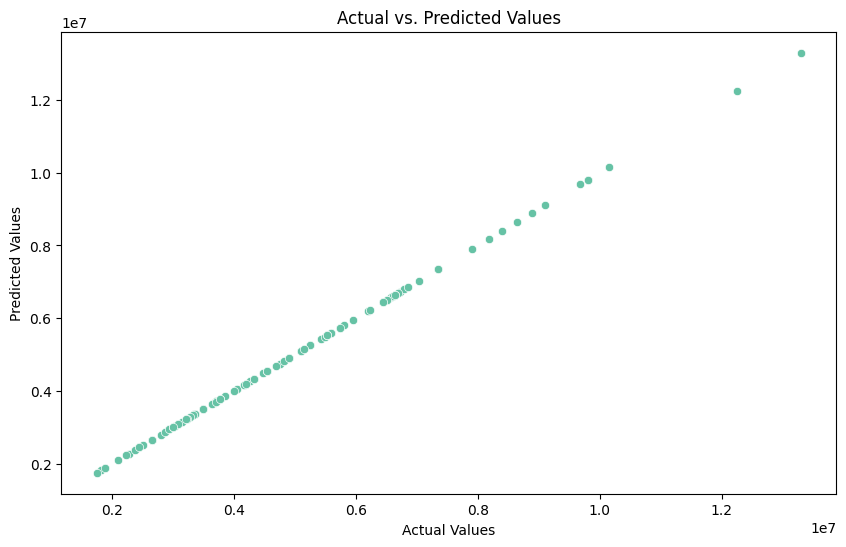

In [114]:
# Visualizing the actual vs. predicted values
plt.figure(figsize=(10, 6))
# Set the color palette
sns.set_palette("Set2")
sns.scatterplot(x=y_test, y=predictions_on_test)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

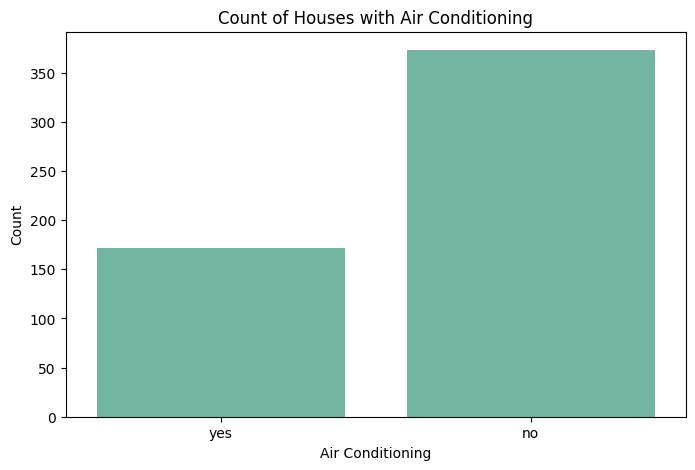

In [115]:
# Countplot for the number of houses with and without air conditioning

plt.figure(figsize=(8, 5))
sns.countplot(x='airconditioning', data=df)
plt.title('Count of Houses with Air Conditioning')
plt.xlabel('Air Conditioning')
plt.ylabel('Count')
plt.show()

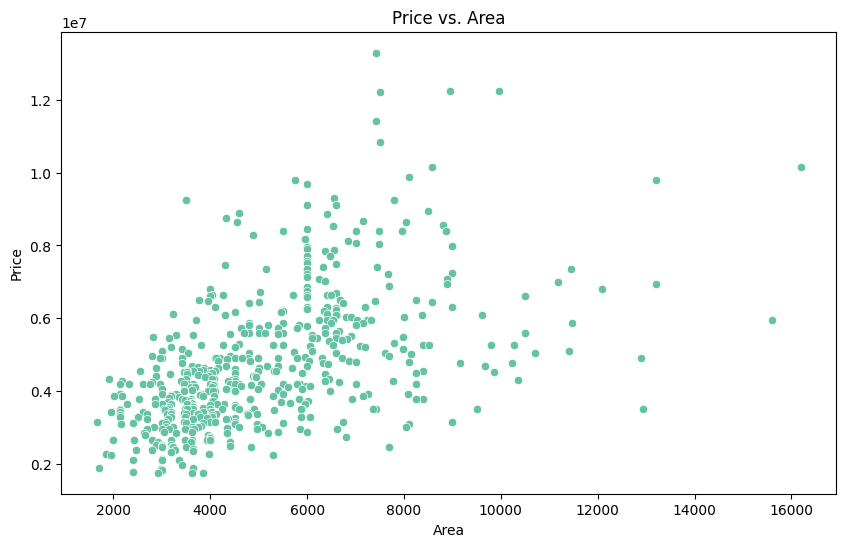

In [116]:
# Scatter plot of price vs. area

plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=df)
plt.title('Price vs. Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

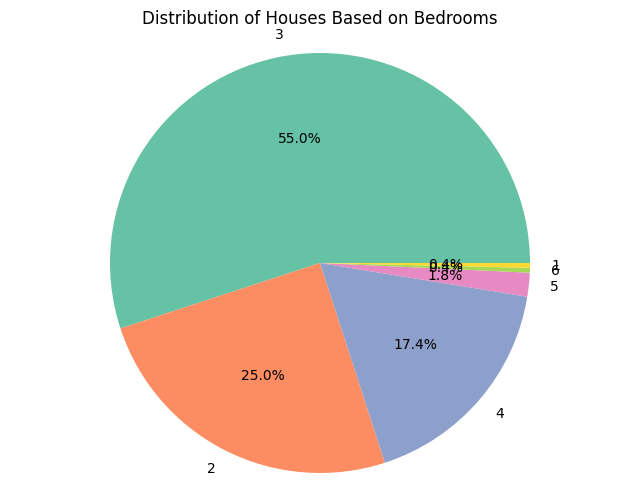

In [117]:
# Pie chart to visualize the distribution of houses based on the number of bedrooms
plt.figure(figsize=(8,6))
bedrooms_count = df['bedrooms'].value_counts()
plt.pie(bedrooms_count, labels=bedrooms_count.index, autopct='%1.1f%%')
plt.title('Distribution of Houses Based on Bedrooms')
plt.axis('equal')
plt.show()

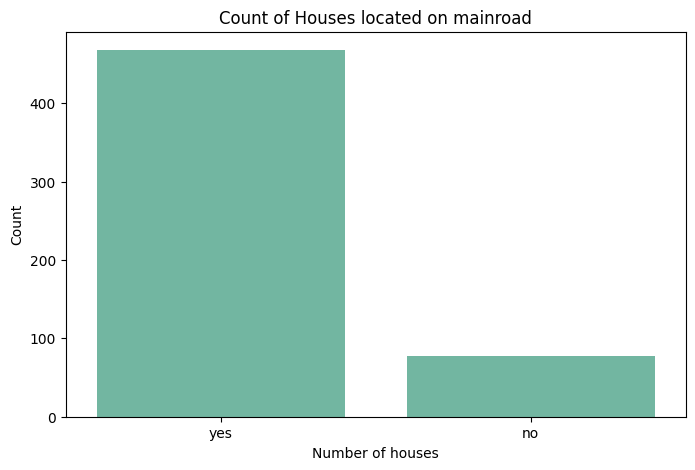

In [107]:
# Countplot (Bar plot) of houses located on mainroad
plt.figure(figsize=(8, 5))
sns.countplot(x='mainroad', data=df)
plt.title('Count of Houses located on mainroad')
plt.xlabel('Number of houses')
plt.ylabel('Count')
plt.show()